## Theoretical part

### System of equations

Stochastic Differential Equation (SDE): $$dx(t) = a(x(t))dt + b(t)dw(t)$$ 
$$ x = (x_1, x_2, x_3)^T $$
$$ x(0) = x_0 = (0.5, 0.05, 0)^T $$
$$ \mathbb{E}x_0 = m_0 $$
$$ cov(x_0, x_0) = Q_0 $$
$$ w(t) \sim \mathcal{N}(0, Q) $$
$$ Y_n = A_t(x(t_n)) + B_{t_n} * W_{t_n}, n \in \mathbb{N} $$

Take the $ a(x(t)) $ and  $ b(t) $ from the article (https://www.degruyter.com/document/doi/10.1515/rnam-2018-0004/html):
$$ a(x(t)) = v^T r(x(t))) $$
$$ v = \begin{bmatrix} -1& 1& 1 \\ 0& -2& 1 \end{bmatrix} $$
$$ r(x_t) = \begin{bmatrix} k_0*x_0(t) - k_1*x_1(t)*x_2(t) \\ k_2*(x_1(t))^2 - k_3*x_2(t) \end{bmatrix} $$
$$ k = (0.5, 0.05, 0.2, 0.01) $$
$$ Q = \begin{bmatrix} \frac{10^{-6}}{h} & 0 & 0 \\ 0 & \frac{10^{-6}}{h} & 0 \\ 0 & 0 & \frac{10^{-6}}{h} \end{bmatrix} $$
$$ G = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$
$$ b(t) = G $$

Generation of SDE solution with step $ h = 0.001 $. Take $ N = 40 000 $ points

Generation of observations with step $ = 1 $. Take $ N_{observ} = 40 $ observations

Taking the values from the cell above and get the following system of equations, which will solve numerically by the Euler-Maruyama method:

$$ x_n = x_{n-1} + v^Tr(x_{n-1})*h + G* \sqrt{Q} * \sqrt{h}*\mathcal{N}(0, 1) $$
$$ y_n = \begin{bmatrix} RT & RT & RT \end{bmatrix} x_n + \mathcal{N}(0, 0.25^2) $$
$$ RT = 32.84 $$

In [527]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats

%matplotlib inline

## Generation

### Variables

##### Variables for grid

In [577]:
N = 20_000
h = 0.001

N_observ = 20
step_observ = 1000

In [578]:
K = np.array([0.5, 0.05, 0.2, 0.01])
v = np.array([[-1, 1, 1],
              [0, -2, 1]])
RT = np.array([32.84] * 3)
G = np.diag([1, 1, 1])
Q = np.diag([10**(-6)/h, 10**(-6)/h, 10**(-6)/h])
X_0 = np.array([[0.5],
                [0.05],
                [0]])

In [579]:
X = np.zeros((3, N), dtype=float)
X = np.concatenate((X_0, X), axis=1)
y = np.zeros(N_observ+1, dtype=float)

In [580]:
X_noise = np.random.normal(loc=0, scale=1, size=(3, N+1))

In [581]:
X_noise.shape

(3, 20001)

In [582]:
X.shape

(3, 20001)

##### Func for noise generation

In [583]:
def noise_f(G, Q, h, X_noise):
    return np.dot(G, np.sqrt(Q)) * np.sqrt(h) @ X_noise

##### a(x(t)):

In [584]:
def get_a_t(v, x, k):
    r = np.array([k[0] * x[0] - k[1] * x[1] * x[2], k[2] * x[1]**2 - k[3] * x[2]])
    return v.T @ r

In [585]:
def get_y(RT, x):
    noise = np.random.normal(loc=0, scale=0.25, size=(1,))
    return np.dot(RT, x) + noise

##### X generation:

In [586]:
for i in tqdm(range(1, N + 1)):
    X[:, i] = X[:, i-1] + h * get_a_t(v, X[:, i-1], K) + noise_f(G, Q, h, X_noise)[:, i]

100%|██████████████████████████████████| 20000/20000 [00:01<00:00, 11255.16it/s]


###### Take a look on X

In [587]:
X

array([[ 5.00000000e-01,  4.99521372e-01,  4.97039335e-01, ...,
         9.91965433e-02,  9.94561446e-02,  9.89314882e-02],
       [ 5.00000000e-02,  5.11477999e-02,  5.14603753e-02, ...,
         2.71580774e-01,  2.73518788e-01,  2.73855950e-01],
       [ 0.00000000e+00, -6.97137679e-04,  4.25246333e-04, ...,
         8.65153566e-01,  8.65634660e-01,  8.64709141e-01]])

In [588]:
for i in range(N_observ+1):
    y[i] = get_y(RT, X[:, i * step_observ])

###### Take a look on observations (y)

In [589]:
y

array([18.07325576, 25.08668866, 31.07796306, 31.68630056, 32.414737  ,
       34.71271374, 33.55242092, 33.11787835, 33.31403528, 34.40925659,
       36.06338999, 36.49403337, 36.44932792, 36.03599725, 32.26984261,
       32.14388729, 35.14597354, 36.90021866, 37.36246443, 39.35395881,
       40.53575081])

## Plots of generation

##### The first dimension of X(t)

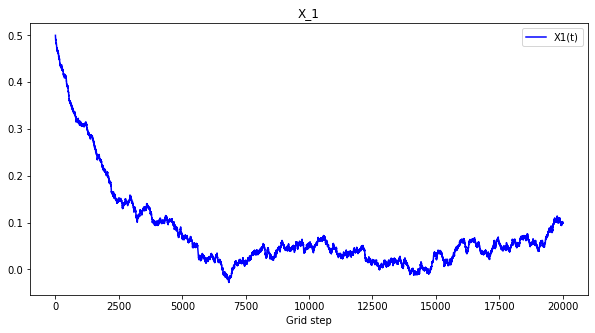

In [590]:
plt.figure(figsize=(10,5))
plt.plot(X[0, :], c="blue", label='X1(t)')
plt.title('X_1')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### The second dimension of X(t)

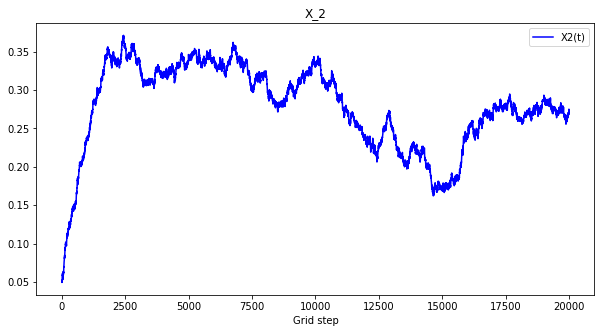

In [591]:
plt.figure(figsize=(10,5))
plt.plot(X[1,:], c="blue", label='X2(t)')
plt.title('X_2')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### The third dimension of X(t)

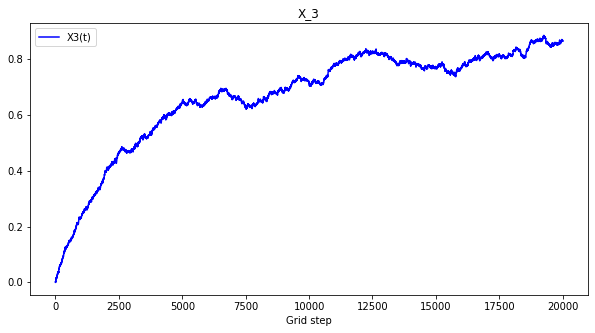

In [592]:
plt.figure(figsize=(10,5))
plt.plot(X[2,:], c="blue", label='X3(t)')
plt.title('X_3')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### Take a look on observations

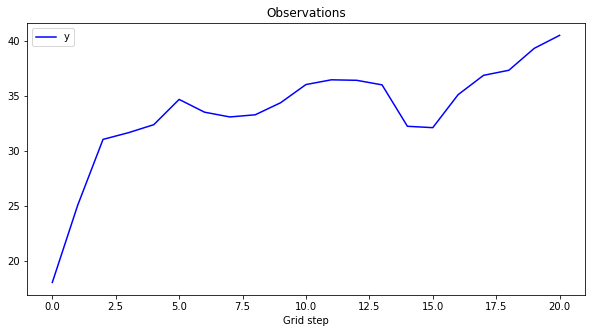

In [593]:
plt.figure(figsize=(10,5))
plt.plot(y, c="blue", label='y', lw=1.5)
plt.title('Observations')
plt.legend()
plt.xlabel("Grid step")
plt.show()

## Filters

### Extended Kalman Filter (EKF)

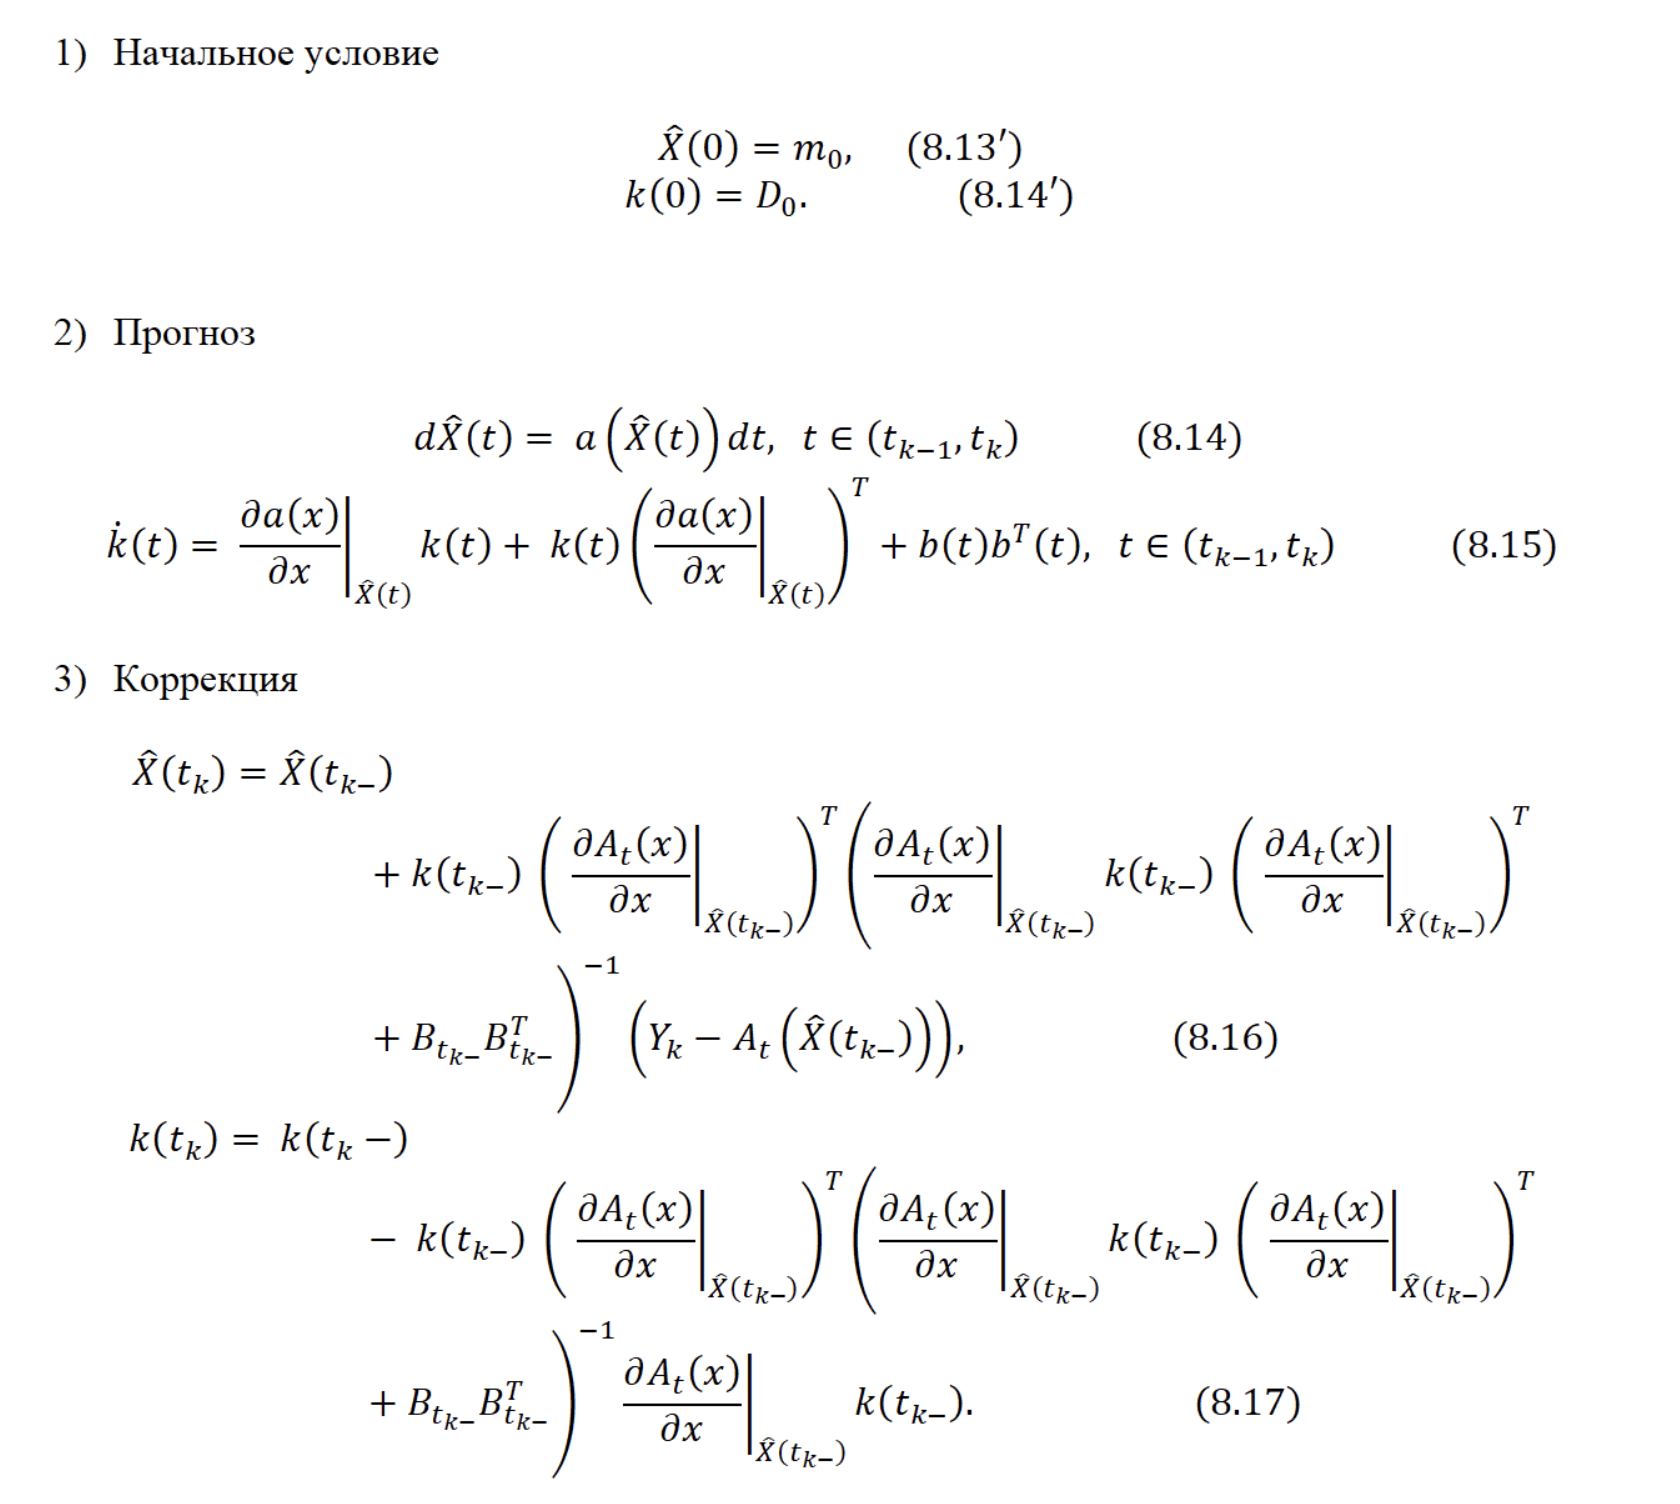

##### In our case:

$$ a(x(t)) = v^T r(x(t))) $$
$$ v = \begin{bmatrix} -1& 1& 1 \\ 0& -2& 1 \end{bmatrix} $$
$$ r(x_t) = \begin{bmatrix} k_0*x_0(t) - k_1*x_1(t)*x_2(t) \\ k_2*(x_1(t))^2 - k_3*x_2(t) \end{bmatrix} $$
$$ k = (0.5, 0.05, 0.2, 0.01) $$

$$ \frac{\delta a(x)}{\delta x} = \begin{bmatrix} -k_0 & -k_1 x_2 & -k_1 x_1 \\ k_0 & -k_1 x_2 - 4 k_2 x_1 & -k_1 x_1 + 2 k_3 \\ k_0 & -k_1 x_2 + 2 k_2 x_1 & -k_1 x_1 -k_3 \end{bmatrix} $$


$$ \frac{\delta A_t(x)}{\delta x} = \begin{bmatrix} RT & RT & RT \end{bmatrix} $$
$$ b_t = G = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} $$
$$ B_t = 1$$

##### Filter initial conditions

In [594]:
m_0 = np.array([[0.5],
                [0.05],
                [0]])
D_0 = np.diag([10**(-6)/h, 10**(-6)/h, 10**(-6)/h])
b = np.diag([1, 1, 1])
B = np.array([1])

##### Filter implementation

In [595]:
class EKF:
    def __init__(self, m_0, D_0, b, B, h=0.001, step_observ=1, N=40_000, N_observ=40):
        """
        Extended Kalman Filter
        @params:
        m_0: math expactation at t = 0
        D_0: cov matrix at t = 0
        b: b(t)
        B: B(t)
        h: step of SDE solutions
        step_observ: observation step
        N: Number of grid points
        N_observ: Number of observations
        """
        self.m_0 = m_0
        self.D_0 = D_0
        self.b = b
        self.B = B
        self.h = h
        self.step_observ = step_observ
        self.N = N
        self.N_observ = N_observ

    
    def _forecast_step(self, v, K, k_t, X_t):
        def _get_da_t(x, k):
            tmp = np.array([[-k[0], -k[1]*x[2], -k[1]*x[1]],
                            [k[0], -k[1]*x[2] - 4*k[2]*x[1], -k[1]*x[1] + 2*k[3]],
                            [k[0], -k[1]*x[2] + 2*k[2]*x[1], -k[1]*x[1] - k[3]]], dtype=float)
            return tmp
        
        def get_a_t(v, x, k):
            r = np.array([k[0] * x[0] - k[1] * x[1] * x[2], k[2] * x[1]**2 - k[3] * x[2]])
            return v.T @ r

    
        a_t = get_a_t(v, X_t, K)
        da_t = _get_da_t(X_t, K)
        dX_t = X_t + a_t * self.h
        dk_t = k_t + self.h * (da_t @ k_t + k_t @ da_t.T + self.b @ self.b.T)
        return dX_t, dk_t

    
    def _correction_step(self, RT, x_t, k_t, y_t):
        A_t = np.dot(RT, x_t)
        dA_t = RT
        X_t_correct = x_t + np.dot(np.dot(k_t @ dA_t.T, (np.dot(dA_t @ k_t, dA_t.T) + self.B @ self.B.T)**(-1)),
                                  y_t - A_t)
        
        K_t_correct = k_t + np.dot(np.dot(k_t @ dA_t.T, (np.dot(dA_t @ k_t, dA_t.T) + self.B @ self.B.T)**(-1)),
                                  dA_t @ k_t)
        
        return X_t_correct, K_t_correct


    def filtration(self, v, K, RT, y):
        EKF_X = np.zeros((3, self.N), dtype=float)
        EKF_X = np.concatenate((self.m_0, EKF_X), axis=1)
        EKF_k_t = self.D_0
        step = int(self.N / self.N_observ)
        for i in range(1, self.N + 1):
            if i % step == 0:
                # correction step
                EKF_X[:, i], EKF_k_t = self._correction_step(RT, EKF_X[:, i - 1], EKF_k_t, y[i // step])
            else:
                # forecast step
                EKF_X[:, i], EKF_k_t = self._forecast_step(v, K, EKF_k_t, EKF_X[:, i - 1])
                
        return EKF_X


###### SDE solution and observations

In [596]:
X = np.zeros((3, N), dtype=float)
X = np.concatenate((X_0, X), axis=1)
y = np.zeros(N_observ+1, dtype=float)
X_noise = np.random.normal(loc=0, scale=1, size=(3, N+1))
for i in range(1, N + 1):
    X[:, i] = X[:, i-1] + h * get_a_t(v, X[:, i-1], K) + noise_f(G, Q, h, X_noise)[:, i-1]

for i in range(N_observ+1):
    y[i] = get_y(RT, X[:, i * step_observ])

###### Filter applying

In [597]:
EKF_filtr = EKF(m_0, D_0, b, B, h, step_observ, N, N_observ)

In [598]:
EKF_X = EKF_filtr.filtration(v, K, RT, y)

## Filter visualization

##### For the first dimension of X(t)

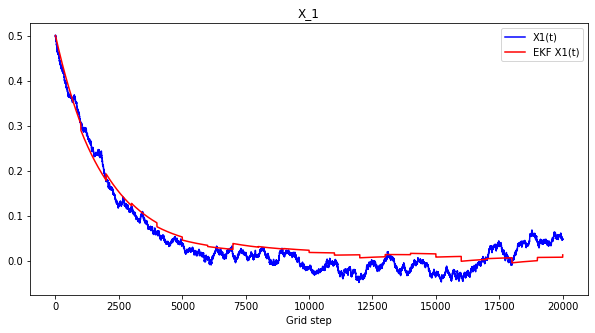

In [600]:
plt.figure(figsize=(10,5))
plt.plot(X[0, :], c="blue", label='X1(t)')
plt.plot(EKF_X[0, :], c="red", label="EKF X1(t)")
plt.title('X_1')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the second dimension of X(t)

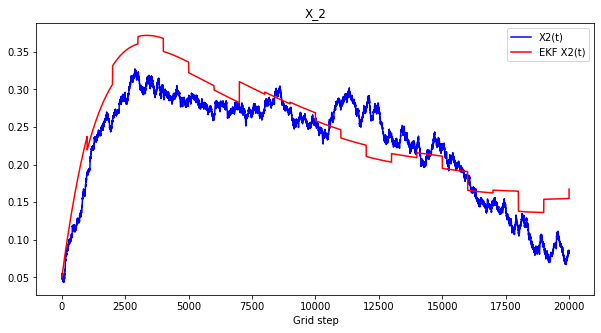

In [601]:
plt.figure(figsize=(10,5))
plt.plot(X[1,:], c="blue", label='X2(t)')
plt.plot(EKF_X[1, :], c="red", label="EKF X2(t)")
plt.title('X_2')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the third dimension of X(t)

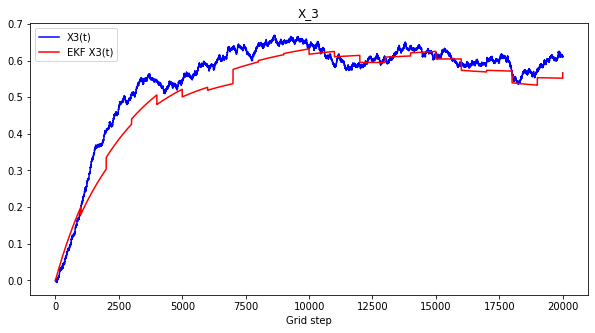

In [602]:
plt.figure(figsize=(10,5))
plt.plot(X[2,:], c="blue", label='X3(t)')
plt.plot(EKF_X[2, :], c="red", label="EKF X3(t)")
plt.title('X_3')
plt.legend()
plt.xlabel("Grid step")
plt.show()

### Particle filter (PF opt)

###### Take $ N_{samples} = 100 $ as number of particles

In [603]:
class PF:
    def __init__(self, noise_std=0.25, N_samples=100, h=0.001, step_observ=1, N=10_000, N_observ=10):
        """
        Particle filter
        @params:
            noise_std: std of zero mean white-noise for observations
            N_samples: Number of particles
            h: step of SDE solutions
            step_observ: observation step
            N: Number of grid points
            N_observ: Number of observations
        """
        self.noise_std = noise_std
        self.N_samples = N_samples
        self.h = h
        self.step_observ = step_observ
        self.N = N
        self.N_observ = N_observ
        self.weights = np.asarray([1/self.N_samples] * self.N_samples)
        self.noise = stats.norm(0, self.noise_std)


    def _forecast_step(self, v, K, Q, G):

        def get_a_t(x, v, k):
            r = np.array([k[0] * x[0] - k[1] * x[1] * x[2], k[2] * x[1]**2 - k[3] * x[2]])
            return v.T @ r


        def noise_f(G, Q, h, X_noise):
            return np.dot(G, np.sqrt(Q)) * np.sqrt(h) @ X_noise


        X_noise = np.random.normal(loc=0, scale=1, size=(3, self.N_samples))
        
        a_t = np.apply_along_axis(get_a_t, axis=1, arr=self.particles, v=v, k=K) * self.h
        add_weights = noise_f(G, Q, self.h, X_noise)
        self.particles += a_t + add_weights.T


    def _correction_step(self, obs, RT):
        
        def get_difference(particle, obs, RT):
            return RT @ particle - obs
        
        correct = np.apply_along_axis(get_difference, axis=1, arr=self.particles, obs=obs, RT=RT)
        self.weights = self.noise.pdf(correct)
        # normalization
        self.weights = self.weights / np.sum(self.weights)

    
    def filtration(self, X_0, y, v, K, Q, G, RT):
        self.particles = np.asarray([X_0[:, 0]] * self.N_samples)
        PF_X = np.zeros((3, self.N), dtype=float)
        PF_X = np.concatenate((X_0, PF_X), axis=1)
        step = int(self.N / self.N_observ)
        for i in range(1, self.N + 1):
            # Forecast step
            self._forecast_step(v, K, Q, G)
            if i % step == 0:
                # Correction step
                obs = y[i // 1000]
                self._correction_step(obs, RT)
            
            PF_X[:, i] = self.particles.T @ self.weights
            
            if i % step == 0:
                # Resampling
                N_eff = 1 / np.sum(self.weights**2)

                if N_eff < self.N_samples/10:
                    index_particles = np.random.choice(range(self.N_samples), self.N_samples, replace=True, p=self.weights)
                    self.particles = self.particles[index_particles]
                    self.weights = np.asarray([1/self.N_samples] * self.N_samples)

        return PF_X

##### Filter initial conditions

In [611]:
noise_std = 0.25
N_samples = 100

###### SDE solution and observations

In [612]:
X = np.zeros((3, N), dtype=float)
X = np.concatenate((X_0, X), axis=1)
y = np.zeros(N_observ+1, dtype=float)
X_noise = np.random.normal(loc=0, scale=1, size=(3, N+1))
for i in range(1, N + 1):
    X[:, i] = X[:, i-1] + h * get_a_t(v, X[:, i-1], K) + noise_f(G, Q, h, X_noise)[:, i-1]

for i in range(N_observ+1):
    y[i] = get_y(RT, X[:, i * step_observ])

###### Filter applying

In [613]:
PF_filtr = PF(noise_std=noise_std, N_samples=N_samples, h=h, step_observ=step_observ, N=N, N_observ=N_observ)

In [614]:
PF_X = PF_filtr.filtration(X_0, y, v, K, Q, G, RT)

## Filter visualization

##### For the first dimension of X(t)

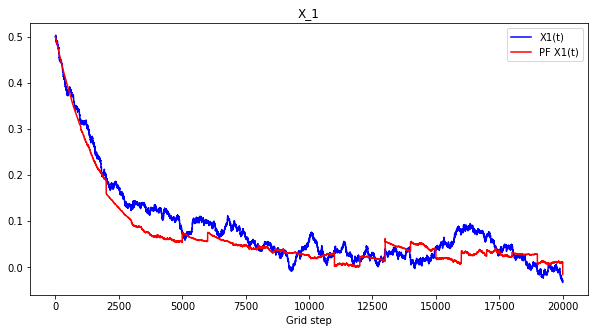

In [615]:
plt.figure(figsize=(10,5))
plt.plot(X[0, :], c="blue", label='X1(t)')
plt.plot(PF_X[0, :], c="red", label="PF X1(t)")
plt.title('X_1')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the second dimension of X(t)

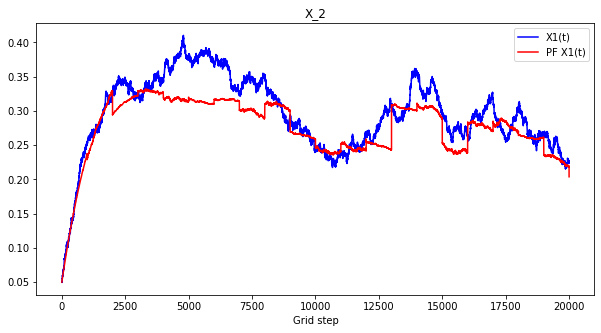

In [616]:
plt.figure(figsize=(10,5))
plt.plot(X[1, :], c="blue", label='X1(t)')
plt.plot(PF_X[1, :], c="red", label="PF X1(t)")
plt.title('X_2')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the third dimension of X(t)

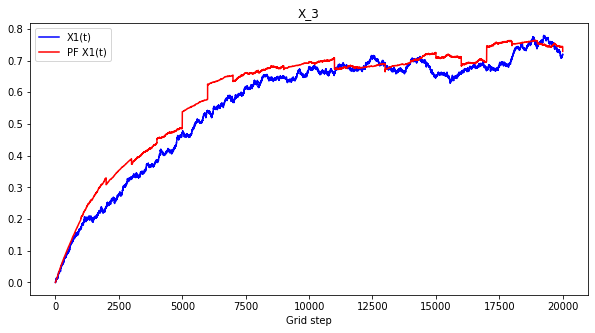

In [617]:
plt.figure(figsize=(10,5))
plt.plot(X[2, :], c="blue", label='X1(t)')
plt.plot(PF_X[2, :], c="red", label="PF X1(t)")
plt.title('X_3')
plt.legend()
plt.xlabel("Grid step")
plt.show()

## Filter comparison

###### SDE solution and observations

In [618]:
X = np.zeros((3, N), dtype=float)
X = np.concatenate((X_0, X), axis=1)
y = np.zeros(N_observ+1, dtype=float)
X_noise = np.random.normal(loc=0, scale=1, size=(3, N+1))
for i in range(1, N + 1):
    X[:, i] = X[:, i-1] + h * get_a_t(v, X[:, i-1], K) + noise_f(G, Q, h, X_noise)[:, i-1]

for i in range(N_observ+1):
    y[i] = get_y(RT, X[:, i * step_observ])

###### Filters applying

In [619]:
EKF_filtr = EKF(m_0, D_0, b, B, h, step_observ, N, N_observ)

In [620]:
EKF_X = EKF_filtr.filtration(v, K, RT, y)

In [621]:
PF_filtr = PF(noise_std=noise_std, N_samples=N_samples, h=h, step_observ=step_observ, N=N, N_observ=N_observ)

In [622]:
PF_X = PF_filtr.filtration(X_0, y, v, K, Q, G, RT)

## Filters visualization

##### For the first dimension of X(t)

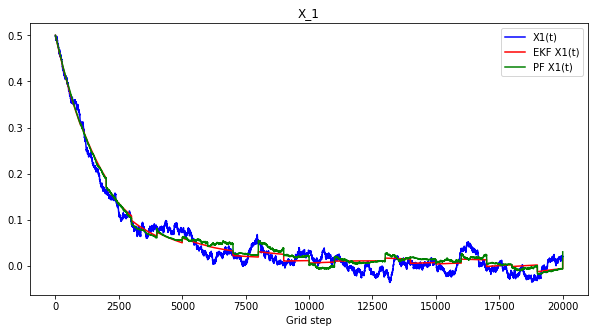

In [623]:
plt.figure(figsize=(10,5))
plt.plot(X[0, :], c="blue", label='X1(t)')
plt.plot(EKF_X[0, :], c="red", label="EKF X1(t)")
plt.plot(PF_X[0, :], c="green", label="PF X1(t)")
plt.title('X_1')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the second dimension of X(t)

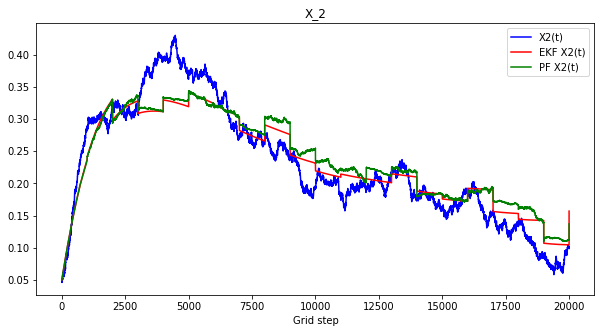

In [624]:
plt.figure(figsize=(10,5))
plt.plot(X[1, :], c="blue", label='X2(t)')
plt.plot(EKF_X[1, :], c="red", label="EKF X2(t)")
plt.plot(PF_X[1, :], c="green", label="PF X2(t)")
plt.title('X_2')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the third dimension of X(t)

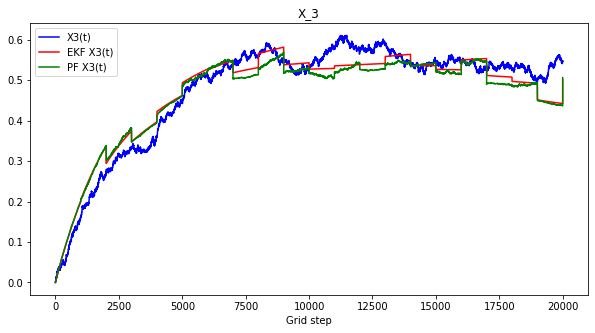

In [625]:
plt.figure(figsize=(10,5))
plt.plot(X[2, :], c="blue", label='X3(t)')
plt.plot(EKF_X[2, :], c="red", label="EKF X3(t)")
plt.plot(PF_X[2, :], c="green", label="PF X3(t)")
plt.title('X_3')
plt.legend()
plt.xlabel("Grid step")
plt.show()

## Averaging

###### For averaging take $ N_{AVG} = 1000 $ trajectories and for each component computing std and std of errors for filters

In [626]:
N_AVG = 1000
X_std = []
X_EKF_std = []
X_PF_std = []

In [627]:
for _ in tqdm(range(N_AVG)):
    X = np.zeros((3, N), dtype=float)
    X = np.concatenate((X_0, X), axis=1)
    y = np.zeros(N_observ+1, dtype=float)
    X_noise = np.random.normal(loc=0, scale=1, size=(3, N+1))
    for i in range(1, N + 1):
        X[:, i] = X[:, i-1] + h * get_a_t(v, X[:, i-1], K) + noise_f(G, Q, h, X_noise)[:, i-1]
    
    for i in range(N_observ+1):
        y[i] = get_y(RT, X[:, i * step_observ])
    
    EKF_X = EKF_filtr.filtration(v, K, RT, y)
    PF_X = PF_filtr.filtration(X_0, y, v, K, Q, G, RT)

    X_std.append(X)
    
    X_EKF_std.append(X - EKF_X)
    
    X_PF_std.append(X - PF_X)

100%|█████████████████████████████████████| 1000/1000 [4:53:32<00:00, 17.61s/it]


In [628]:
std_x = np.std(X_std, axis=0)
std_EKF_x = np.std(X_EKF_std, axis=0)
std_PF_x = np.std(X_PF_std, axis=0)

### STD plots

##### For the first dimension of X(t)

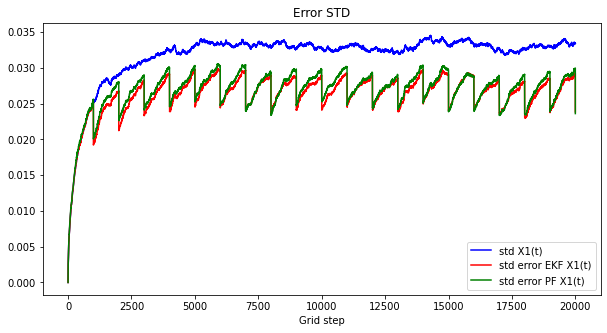

In [629]:
plt.figure(figsize=(10,5))
plt.plot(std_x[0, :], c="blue", label='std X1(t)')
plt.plot(std_EKF_x[0, :], c="red", label='std error EKF X1(t)')
plt.plot(std_PF_x[0, :], c="green", label='std error PF X1(t)')
plt.title('Error STD')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the second dimension of X(t)

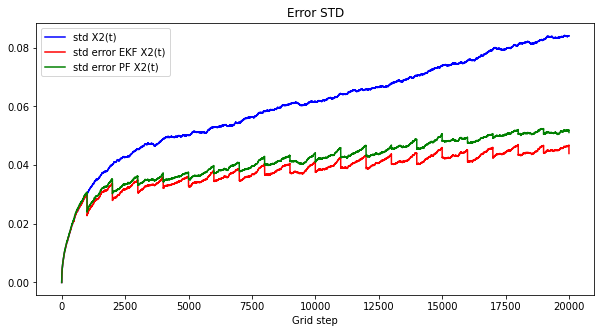

In [630]:
plt.figure(figsize=(10,5))
plt.plot(std_x[1,:], c="blue", label='std X2(t)')
plt.plot(std_EKF_x[1, :], c="red", label='std error EKF X2(t)')
plt.plot(std_PF_x[1, :], c="green", label='std error PF X2(t)')
plt.title('Error STD')
plt.legend()
plt.xlabel("Grid step")
plt.show()

##### For the third dimension of X(t)

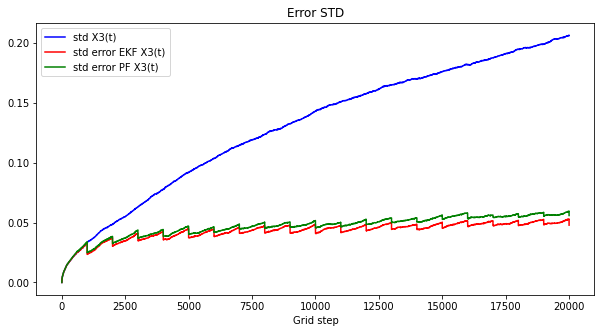

In [631]:
plt.figure(figsize=(10,5))
plt.plot(std_x[2,:], c="blue", label='std X3(t)')
plt.plot(std_EKF_x[2, :], c="red", label='std error EKF X3(t)')
plt.plot(std_PF_x[2, :], c="green", label='std error PF X3(t)')
plt.title('Error STD')
plt.legend()
plt.xlabel("Grid step")
plt.show()